In [8]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

# Making dataset

Making dataset using make_dataset_yolo.py file in make_dataset folder.

You can download the dataset used in this project here [Link to google drive](https://drive.google.com/drive/folders/1_U94BE5M1jTqxIfwEcX9FBn-V0F0dcaF?usp=sharing).
The dataset contains 3.5k images (2k train, 1k validation and 0.5k test) and it follows the [Ultralytics YOLO format](https://docs.ultralytics.com/datasets/segment/).

# Finetune pretrained model

Code example:

In [ ]:
model = YOLO("yolo11s-seg.pt")
dataset_path = "dataset_path"
yaml_path = f"{dataset_path}/data.yaml"

num_epochs = 50
image_size = 640
results = model.train(data=yaml_path, epochs=num_epochs, imgsz=image_size)

# Card detection and recognition

The following code was adapted from the [`jslok/card-scanner`](https://github.com/jslok/card-scanner) repository.

Try it out below:

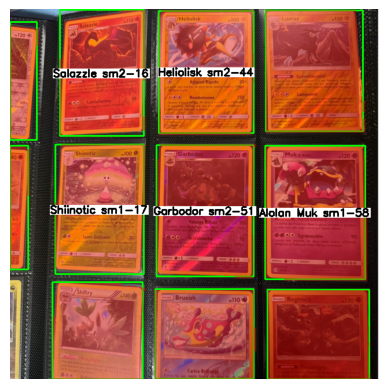

In [12]:
from card_scanner.tools import scanner
from card_scanner.tools.detector import Detector 

# weights = "weights/yolov11s_finetune_weights.pt"
# model = YOLO(weights)

weights = "weights/yolov11s_finetune_weights_int8_openvino_model"
model = YOLO(weights, task="segment")

image_number = 3 #1 to 3
imagePath = f'test_img{image_number}.jpg'
size = 640
scoreThreshold = .5
mirror = False
include_flipped = False

print("Starting process - inference with image")

image_original = scanner.read_image(imagePath, size)
image_copy = image_original.copy()

detector = Detector(model)

detections = detector.detect_objects(image_original, scoreThreshold)

# Extract cards given the masks and transforms their perspective
scanner.process_masks_to_cards(image_original, detections, mirror)

# Generate image hashes for each card
scanner.hash_cards(detections, include_flipped)

# Match the generated hashes to the database (file on card_scanner/data/hashes_dphash_16.json)
scanner.match_hashes(detections, include_flipped)

scanner.draw_boxes(image_copy, detections)
scanner.draw_masks(image_copy, detections)
scanner.write_card_labels(image_copy, detections)

scanner.plot_image(image_copy)
    

# Benchmark
Models are evaluated using the [Benchmark](https://docs.ultralytics.com/modes/benchmark/) functionality from Ultralytics YOLO. 

Code example:

In [ ]:
from ultralytics.utils.benchmarks import benchmark

weights = "path_to_weights"

model = YOLO(weights)
yaml_path = f"path_to_yaml"
image_size = 640
is_half = False
is_int8 = False
device = "cpu"

benchmark(model=model, data=yaml_path, imgsz=image_size, half=is_half, int8=is_int8, device=device)